# Classification Assignment

The main goal of this assignment is to check in on your ability to access, load, explore, and make predictions using classification models.  For next Wednesday, you are to do the following:

1. Locate a dataset on Kaggle, NYC Open Data, UCI Machine Learning Repository, or other resource that contains data that can be addressed through a classification task
2. Load and explore the data for missing values and perform a brief EDA
3. Frame and state the classification problem
4. Split your data into train and test sets
4. Implement a `DummyClassifier`, `KNeighborsClassifier`, and `LogisticRegression` model.
5. Improve the models by performing a `GridSearchCV` for `n_neighbors` and `C` parameters respectively.  Include a scale transformation in your pipeline for KNN and a `PolynomialFeatures` step in the Logistic model.
6. Discuss the outcome of your classifiers using the `classification_report`.  Which did the best?  Do you prefer a recall or a precision oriented model?  Why?

**EXTRA**:

- Include `SGDClassifier`
- Incorporate AUC and ROC curves


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [9]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
titanic = titanic.drop(columns=['deck'])

In [13]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [21]:
titanic_clean = titanic.dropna(axis='columns')

In [22]:
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived      891 non-null int64
pclass        891 non-null int64
sex           891 non-null object
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null float64
class         891 non-null category
who           891 non-null object
adult_male    891 non-null bool
alive         891 non-null object
alone         891 non-null bool
dtypes: bool(2), category(1), float64(1), int64(4), object(3)
memory usage: 58.5+ KB


In [24]:
tclean = titanic_clean

In [25]:
tclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived      891 non-null int64
pclass        891 non-null int64
sex           891 non-null object
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null float64
class         891 non-null category
who           891 non-null object
adult_male    891 non-null bool
alive         891 non-null object
alone         891 non-null bool
dtypes: bool(2), category(1), float64(1), int64(4), object(3)
memory usage: 58.5+ KB


Text(0.5,1,'Titanic Survival')

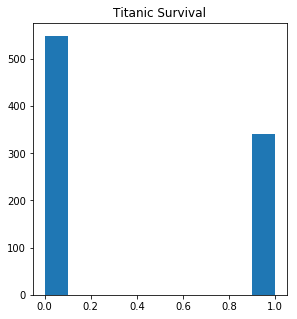

In [26]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.hist(tclean.survived)
plt.title('Titanic Survival')

this makes sense because 'survival' is boolean.

Text(0.5,1,'Titanic class')

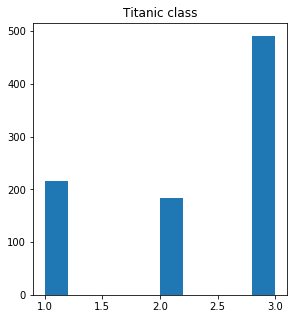

In [29]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.hist(tclean.pclass)
plt.title('Titanic class')

In [30]:
survived = tclean.groupby('survived')

In [31]:
print(survived)

In [33]:
survived.mean()

,pclass,sibsp,parch,fare,adult_male,alone
survived,,,,,,
0,2.531876,0.553734,0.329690,22.117887,0.817851,0.681239
1,1.950292,0.473684,0.464912,48.395408,0.257310,0.476608


In [34]:
survived.box()

AttributeError: 'DataFrameGroupBy' object has no attribute 'box'